# Webscraping Data

We will be collecting our data from https://weatherandclimate.com/ this website contains monthly and yearly breakdown of weather data for different regions in India. The website is structured such that the uri '/region/month-year' displays a table containg the weather information for the given's region month and year. Thus, we can webscrape this data.

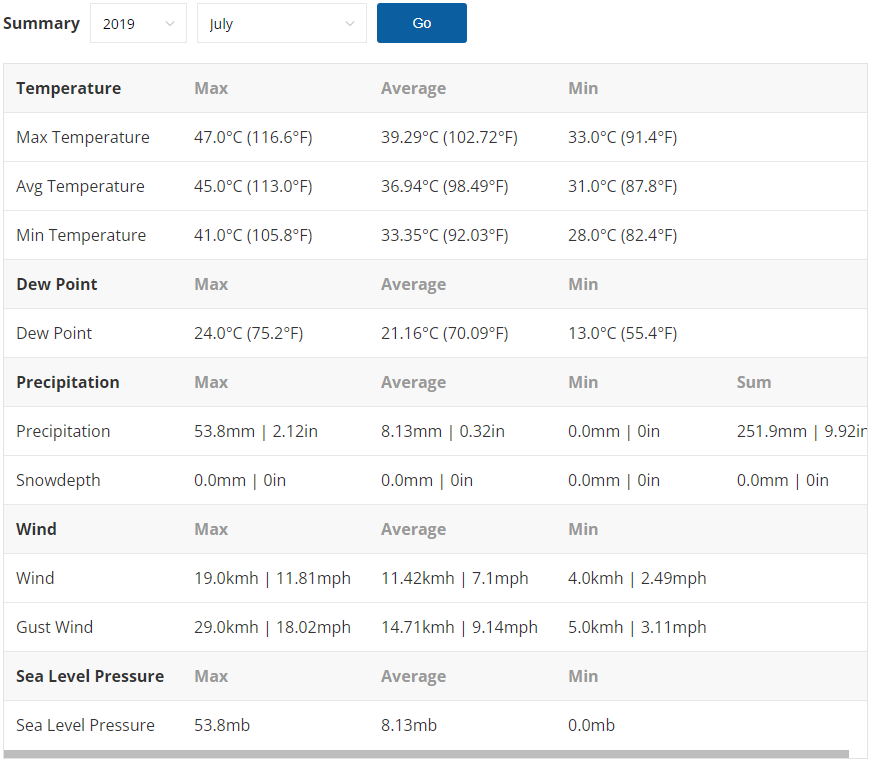

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
filepath = "/content/drive/MyDrive/CIS 519/Data/data.csv"


In [3]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

regions = ['andaman-and-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra-and-nagar-haveli', 'daman-and-diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal-pradesh', 'jammu-and-kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh', 'uttarakhand', 'west-bengal']
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
data_cols = ["region", "year", "month", "temp_max", "temp_avg_daily_max", "temp_min_daily_max", "temp_max_daily_avg", "temp_avg", "temp_min_daily_avg", "temp_max_daily_min", "temp_avg_daily_min", "temp_min", "dew_pt_max", "dew_pt_avg", "dew_pt_min", "precipitation_max", "precipitation_avg", "precipitation_min", "precipitation_sum", "snow_depth_max", "snow_depth_avg", "snow_depth_min", "snow_depth_sum", "wind_max", "wind_avg", "wind_min", "gust_max", "gust_avg", "gust_min", "sea_level_preassure_max", "sea_level_preassure_avg", "sea_level_preassure_min"]
data = []
for region in tqdm(regions) :
  for yr in tqdm(range(2010, 2021)):
    for month in months :
      path = 'https://weatherandclimate.com/' + region + "/" + month + '-' + str(yr)

      # Making a GET request
      r = requests.get(path)

      # check status code for response received
      # success code - 200
      if (not(r.status_code == 200)) :
        continue


      # Parsing the HTML
      soup = BeautifulSoup(r.content, 'html.parser')
      table = soup.find('table', class_='tb8')
      rows = table.find_all('tr')


      datarow = list()
      datarow.append(region)
      datarow.append(yr)
      datarow.append(month)
      # the table will have 14 rows some rows are just header information
      for i in range(14) :
        if (i == 0 or i == 4 or i == 6 or i == 9 or i == 12) : # header/information rows
          continue
        cols = rows[i].find_all('td');
        for j in range(1, len(cols)) :
          if (not(cols[j].text == '')) :
            datarow.append(cols[j].text)

      data.append(tuple(datarow))



dataset = pd.DataFrame(data, index = range(len(data)), columns = data_cols)
dataset.to_csv(filepath, index=False)
display(dataset)


100%|██████████| 37/37 [28:59<00:00, 47.00s/it]


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/CIS 519/Data'

In [ ]:
dataset = pd.DataFrame(data, index = range(len(data)), columns = data_cols)
dataset.to_csv(filepath, index=False)
display(dataset)

,region,year,month,temp_max,temp_avg_daily_max,temp_min_daily_max,temp_max_daily_avg,temp_avg,temp_min_daily_avg,temp_max_daily_min,...,snow_depth_sum,wind_max,wind_avg,wind_min,gust_max,gust_avg,gust_min,sea_level_preassure_max,sea_level_preassure_avg,sea_level_preassure_min
0,andaman-and-nicobar-islands,2010,january,28.0°C (82.4°F),27.55°C (81.59°F),27.0°C (80.6°F),28.0°C (82.4°F),27.42°C (81.36°F),27.0°C (80.6°F),28.0°C (82.4°F),...,0.0mm | 0in,26.0kmh | 16.16mph,17.71kmh | 11.0mph,10.0kmh | 6.21mph,35.0kmh | 21.75mph,24.71kmh | 15.35mph,15.0kmh | 9.32mph,5.3mb,0.9mb,0.0mb
1,andaman-and-nicobar-islands,2010,february,28.0°C (82.4°F),27.54°C (81.57°F),26.0°C (78.8°F),28.0°C (82.4°F),27.46°C (81.43°F),26.0°C (78.8°F),28.0°C (82.4°F),...,0.0mm | 0in,23.0kmh | 14.29mph,15.68kmh | 9.74mph,7.0kmh | 4.35mph,31.0kmh | 19.26mph,21.68kmh | 13.47mph,10.0kmh | 6.21mph,0.0mb,0.0mb,0.0mb
2,andaman-and-nicobar-islands,2010,march,30.0°C (86.0°F),28.48°C (83.26°F),27.0°C (80.6°F),30.0°C (86.0°F),28.39°C (83.1°F),27.0°C (80.6°F),29.0°C (84.2°F),...,0.0mm | 0in,19.0kmh | 11.81mph,10.13kmh | 6.29mph,4.0kmh | 2.49mph,27.0kmh | 16.78mph,14.1kmh | 8.76mph,6.0kmh | 3.73mph,1.5mb,0.14mb,0.0mb
3,andaman-and-nicobar-islands,2010,april,30.0°C (86.0°F),29.73°C (85.51°F),29.0°C (84.2°F),30.0°C (86.0°F),29.67°C (85.41°F),29.0°C (84.2°F),30.0°C (86.0°F),...,0.0mm | 0in,13.0kmh | 8.08mph,7.0kmh | 4.35mph,4.0kmh | 2.49mph,18.0kmh | 11.18mph,9.63kmh | 5.98mph,5.0kmh | 3.11mph,2.5mb,0.42mb,0.0mb
4,andaman-and-nicobar-islands,2010,may,31.0°C (87.8°F),30.45°C (86.81°F),30.0°C (86.0°F),31.0°C (87.8°F),30.26°C (86.47°F),30.0°C (86.0°F),31.0°C (87.8°F),...,0.0mm | 0in,38.0kmh | 23.61mph,16.35kmh | 10.16mph,3.0kmh | 1.86mph,57.0kmh | 35.42mph,23.52kmh | 14.61mph,4.0kmh | 2.49mph,30.1mb,4.81mb,0.0mb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,west-bengal,2020,august,38.0°C (100.4°F),33.81°C (92.86°F),30.0°C (86.0°F),35.0°C (95.0°F),31.65°C (88.97°F),29.0°C (84.2°F),30.0°C (86.0°F),...,0.0mm | 0in,22.0kmh | 13.67mph,13.26kmh | 8.24mph,7.0kmh | 4.35mph,34.0kmh | 21.13mph,19.58kmh | 12.17mph,9.0kmh | 5.59mph,34.9mb,7.97mb,0.0mb
4880,west-bengal,2020,september,35.0°C (95.0°F),33.2°C (91.76°F),31.0°C (87.8°F),32.0°C (89.6°F),30.67°C (87.21°F),29.0°C (84.2°F),28.0°C (82.4°F),...,0.0mm | 0in,17.0kmh | 10.56mph,11.9kmh | 7.39mph,4.0kmh | 2.49mph,27.0kmh | 16.78mph,18.27kmh | 11.35mph,5.0kmh | 3.11mph,37.8mb,8.31mb,0.1mb
4881,west-bengal,2020,october,34.0°C (93.2°F),31.65°C (88.97°F),27.0°C (80.6°F),32.0°C (89.6°F),29.42°C (84.96°F),25.0°C (77.0°F),28.0°C (82.4°F),...,0.0mm | 0in,17.0kmh | 10.56mph,8.42kmh | 5.23mph,4.0kmh | 2.49mph,25.0kmh | 15.53mph,12.58kmh | 7.82mph,7.0kmh | 4.35mph,15.7mb,2.59mb,0.0mb
4882,west-bengal,2020,november,33.0°C (91.4°F),29.97°C (85.95°F),27.0°C (80.6°F),29.0°C (84.2°F),27.0°C (80.6°F),24.0°C (75.2°F),25.0°C (77.0°F),...,0.0mm | 0in,13.0kmh | 8.08mph,9.57kmh | 5.95mph,5.0kmh | 3.11mph,19.0kmh | 11.81mph,13.97kmh | 8.68mph,7.0kmh | 4.35mph,0.2mb,0.01mb,0.0mb
